In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import time
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
X = pd.read_csv('DataFinal_clean.csv')

In [118]:
labels = X['gestage']
X = X.drop(['gestage'],axis=1)
X.shape

(3675, 4127)

In [119]:
X_df = X.copy()
X_df.drop(X_df.iloc[:, 12:4097], inplace=True, axis=1)
X_df = X_df.set_index('ptid')
X_df.head()

,Nbabies,pregravidbmi,gravida,para,term,preterm,abort,tab,sab,ectopic,...,payor_MCAID OS,payor_MCAIDHMO,payor_MCARE,payor_MCARE AD,payor_MG CARE,payor_OTHER,payor_SELF PAY,payor_SO HLTH,payor_TRICARE,payor_UNITED
ptid,,,,,,,,,,,,,,,,,,,,,
540,0.0,0.048746,0.066667,0.083333,0.000000,0.2,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
567,0.0,0.030289,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
637,0.0,0.050639,0.066667,0.083333,0.083333,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
749,0.0,0.019877,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
780,0.0,0.050639,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
X_df.shape

(3675, 41)

In [ ]:
## GRID SEARCH?
## SCALED INPUTS?

## PARALLELIZE

## epochs 
## batch size
## number of nodes
## number of layers
## learning rate? 

## optimizer/activations

In [81]:
# BASE MODEL

model = Sequential()
model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_df, labels, validation_split=0.2, epochs=50, batch_size=10)

Train on 2940 samples, validate on 735 samples
Epoch 1/10
2940/2940 [==============================] - 3s 949us/step - loss: 1016.5809 - val_loss: 304.2153
Epoch 2/10
2940/2940 [==============================] - 1s 256us/step - loss: 71.9481 - val_loss: 25.0057
Epoch 3/10
2940/2940 [==============================] - 1s 261us/step - loss: 20.4260 - val_loss: 18.3264
Epoch 4/10
2940/2940 [==============================] - 1s 235us/step - loss: 14.9074 - val_loss: 14.1641
Epoch 5/10
2940/2940 [==============================] - 1s 232us/step - loss: 11.6125 - val_loss: 11.9239
Epoch 6/10
2940/2940 [==============================] - 1s 243us/step - loss: 9.8748 - val_loss: 10.7653
Epoch 7/10
2940/2940 [==============================] - 1s 242us/step - loss: 8.9463 - val_loss: 10.3698
Epoch 8/10
2940/2940 [==============================] - 1s 242us/step - loss: 8.4712 - val_loss: 9.8514
Epoch 9/10
2940/2940 [==============================] - 1s 245us/step - loss: 8.1663 - val_loss: 9.6743
Ep

[244.73687951743196, 25.690243675595237, 18.79137892301391, 14.411016944314348, 12.034012617708063, 10.852772604040547, 10.324720454053814, 9.918577396139806, 9.639612859609176, 9.473647773671312]


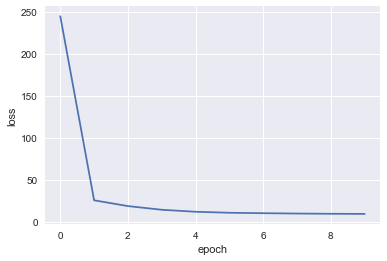

In [129]:
# BASE MODEL

model = Sequential()
model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
fit = model.fit(X_df, labels, validation_split=0.2, epochs=10, batch_size=10, verbose=0)

plt.plot(fit.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show

print(fit.history['val_loss'])

[1368.890662368463, 1129.0528273809523, 779.4904955390359, 429.3317067671795, 179.01190092125717, 65.7746722941496, 33.68888313916265, 26.740794486740008, 24.290270111187784, 22.57080758023424]


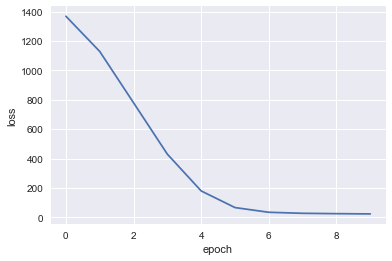

In [106]:
# BASE MODEL - larger batch

model = Sequential()
model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
fit = model.fit(X_df, labels, validation_split=0.2, epochs=10, batch_size=50, verbose=0)

plt.plot(fit.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show

print(fit.history['val_loss'])

[16.105772914057027, 10.466442893976408, 10.556560925816559, 9.231217148636475, 9.230323056256095, 9.04887930351075, 9.056823832905522, 9.233882394627523, 8.984254615539749, 8.961805378823053]


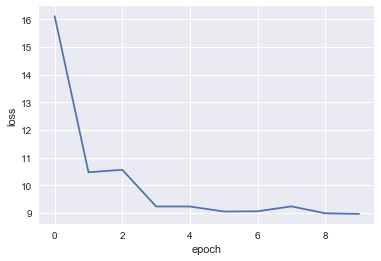

In [107]:
# BASE MODEL - smaller batch -- slightly better? 

model = Sequential()
model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
fit = model.fit(X_df, labels, validation_split=0.2, epochs=10, batch_size=2, verbose=0)

plt.plot(fit.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show

print(fit.history['val_loss'])

[15.451206211515126, 10.221828795675517, 9.511901196923588, 9.290914187045628, 9.187987825891549, 9.169205938064222, 9.098473759507444, 9.13888297471769, 9.067487003867114, 9.230702045807602, 9.073835206762919, 9.091891856539716, 9.395273650802519, 9.086699646348958, 9.235516889140225, 9.067324032244228, 9.098761323165325, 9.015232036526308, 9.296986295465304, 9.07709378830227, 9.341526110004, 9.191166948278745, 9.276545681496037, 9.181437369268767, 9.105732938371041, 9.08367767313077, 9.626227926447683, 9.155064642140452, 8.99685214604853, 9.104450106504848, 9.013569500821257, 9.985038638094656, 9.19113248154635, 9.11459658765519, 9.103057430687734, 9.602224419795318, 9.283660504624855, 9.33384680405994, 9.236000940198123, 9.418850443344944, 9.18761887438342, 9.115255886487518, 9.230329560325163, 9.354489511376894, 9.271241522198512, 9.48197506883492, 9.48650103628534, 9.243037263494061, 9.242710576758904, 9.155921311137982]


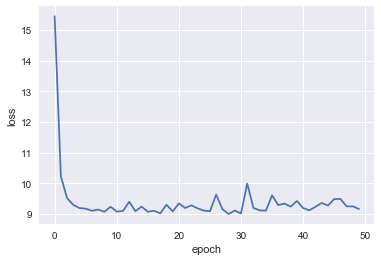

In [124]:
# BASE MODEL - smaller batch -- more epochs

model = Sequential()
model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
fit = model.fit(X_df, labels, validation_split=0.2, epochs=50, batch_size=2, verbose=0)

plt.plot(fit.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show

print(fit.history['val_loss'])

[25.79495820220636, 16.048827041574075, 12.095553403808957, 10.485215398730064, 9.871050996237061, 9.46587254846988, 9.271578314150272, 9.141264067012436, 9.062308062805611, 9.051581049933523]


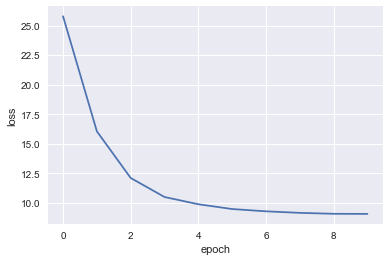

In [123]:
# BASE MODEL - smaller batch 

model = Sequential()
model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
fit = model.fit(X_df, labels, validation_split=0.2, epochs=10, batch_size=5, verbose=0)

plt.plot(fit.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show

print(fit.history['val_loss'])

[15.894831637946927, 9.293103694915771, 23.901299995629966, 25.17490174170254, 19.198753240157146, 9.361162265141806, 9.902764798832589, 9.950460778207194, 9.074101310198, 14.178751668151545, 9.219762892950149, 12.307480121145444, 12.684236623802963, 9.297751477989209, 9.197938241723444, 9.11905894636297, 10.127031462938607, 10.786946080979847, 11.29348442830196, 11.636393655725078, 15.674722483368958, 9.527803246666785, 10.19551170845421, 9.04453796351037, 9.322210991463693, 15.195434343247186, 9.363579511642456, 9.251085005649903, 9.892831868865864, 10.821467258492294, 9.396824788074104, 10.141976508964486, 10.16780273687272, 11.166586146873682, 9.531669486947612, 11.323500558632572, 9.275375389728417, 13.50081529098303, 12.6151811946817, 9.435408560191693, 10.720775844288521, 17.28555918713005, 11.330879349286864, 9.808085967083366, 9.194002836739935, 9.183016739734986, 11.616448833017934, 10.253703852089084, 10.570716126435467, 10.160588186614367]


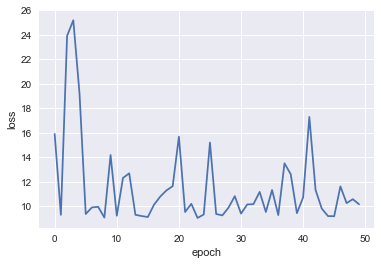

In [122]:
# BASE MODEL w/ SGD

model = Sequential()
model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='SGD')
fit = model.fit(X_df, labels, validation_split=0.2, epochs=50, batch_size=10, verbose=0)

plt.plot(fit.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show

print(fit.history['val_loss'])

[22.31215708920745, 13.37539006577057, 10.65216410403349, 9.724448959843642, 9.467465373123584, 9.287546763614733, 9.242126979795444, 9.26582845660294, 9.306435061149857, 9.177316154549722]


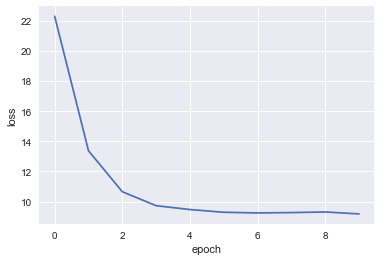

In [110]:
# DEEPER MODEL

model = Sequential()
model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(24, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
fit = model.fit(X_df, labels, validation_split=0.2, epochs=10, batch_size=10, verbose=0)

plt.plot(fit.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show

print(fit.history['val_loss'])

[12.098933987066049, 9.700184169067006, 9.249200231161247, 9.028078385964543, 9.38979516507817, 9.40545061332028, 9.613139394189226, 9.207474975865715, 9.231965897135995, 9.54032552120637, 10.064520615602838, 9.910593063652922, 9.72687496650381, 9.410855148215683, 9.394586840454412, 10.201724077568572, 9.168511273098641, 9.065818219160548, 9.133705765110294, 9.474595391020483, 9.170956392576095, 9.314932565097095, 9.273343139562478, 9.756684087571644, 10.080930094329679]


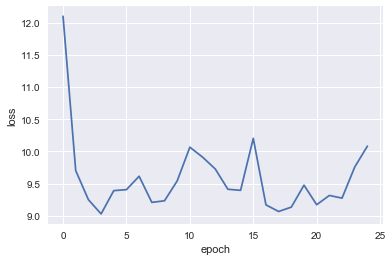

In [126]:
# DEEPER MODEL

model = Sequential()
model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
fit = model.fit(X_df, labels, validation_split=0.2, epochs=25, batch_size=5, verbose=0)

plt.plot(fit.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show

print(fit.history['val_loss'])

[70.06620381154171, 21.58572376666426, 15.39868146546033, 11.916533549626669, 10.549649277511907, 10.013468401772636, 9.633190352900499, 9.497734909965878, 9.36355877733555, 9.261879496022958]


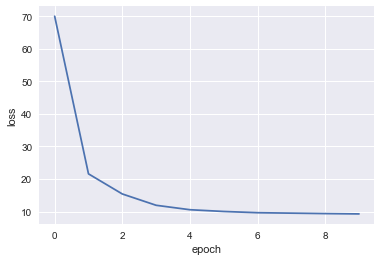

In [131]:
# BASE MODEL - WIDER

model = Sequential()
model.add(Dense(64, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
fit = model.fit(X_df, labels, validation_split=0.2, epochs=10, batch_size=10, verbose=0)

plt.plot(fit.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show

print(fit.history['val_loss'])

[18.66006293264376, 11.231421285746048, 9.806237255634905, 9.52075531612448, 9.680705689248585, 9.093916471312646, 9.160250017432128, 9.00352398554484, 9.274614538667965, 9.057730684475024]


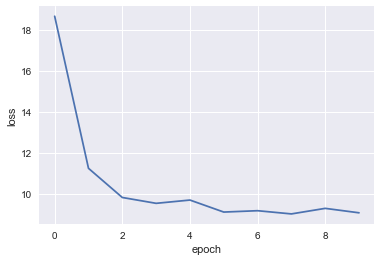

In [132]:
# WIDER MODEL

model = Sequential()
model.add(Dense(64, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
fit = model.fit(X_df, labels, validation_split=0.2, epochs=10, batch_size=10, verbose=0)

plt.plot(fit.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show

print(fit.history['val_loss'])

[15.079423382168724, 10.100318984920476, 9.70583527307121, 9.258768870717002, 9.043234674298034, 9.083512790754538, 9.123245343059098, 9.169886228989581, 9.231447684521578, 9.062470249578256]


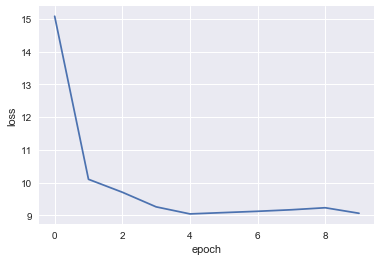

In [127]:
# WIDER MODEL

model = Sequential()
model.add(Dense(100, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
fit = model.fit(X_df, labels, validation_split=0.2, epochs=10, batch_size=10, verbose=0)

plt.plot(fit.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show

print(fit.history['val_loss'])

[9.77597834463833, 9.569014339219956, 9.211164738045257, 9.738904485897143, 9.89689403326333, 9.4072566583854, 9.724925290970575, 9.890614506338729, 9.437932490491542, 9.355672133212186]


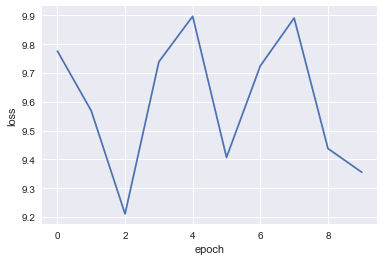

In [138]:
# MUCH WIDER MODEL

model = Sequential()
model.add(Dense(500, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
fit = model.fit(X_df, labels, validation_split=0.2, epochs=10, batch_size=10, verbose=0)

plt.plot(fit.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show

print(fit.history['val_loss'])

[9.759465780511473, 10.108889664111494, 9.514871402034776, 9.251292785039317, 10.754624300567928, 9.345765420113102, 9.704117271912816, 9.027781620872569, 13.286130019150624, 9.711004578443815, 9.39189199633947, 9.606317016161775, 9.87497945089324, 10.628797234969886, 9.435852843341829, 9.720372546408452, 10.584764839032172, 9.511696282194508, 9.437091068713768, 9.687865613013201]


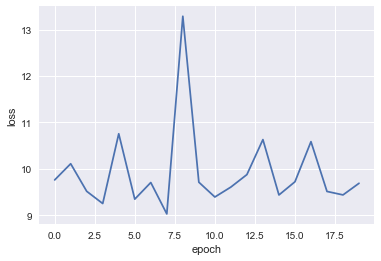

In [134]:
# WIDER MODEL w/ SMALLER BATCH

model = Sequential()
model.add(Dense(100, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
fit = model.fit(X_df, labels, validation_split=0.2, epochs=20, batch_size=2, verbose=0)

plt.plot(fit.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show

print(fit.history['val_loss'])

[12.277453145202326, 10.04624213572262, 9.9805836434267, 9.899878621912327, 9.173260344534505, 9.206144194213712, 10.439240106919996, 10.114316757033471, 11.66457529781627, 9.060270466772067, 9.12059581117565, 9.241936660948253, 10.179224834150197, 9.899284573639331, 9.439412979852586, 9.292869766553244, 9.64386390504383, 9.292279561360678, 10.391392745128295, 10.05403686299616]


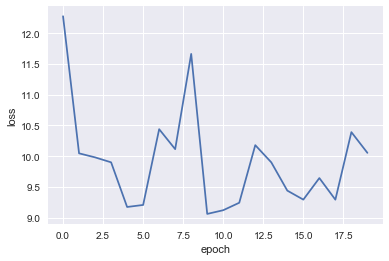

In [130]:
# WIDER + DEEPER

model = Sequential()
model.add(Dense(100, input_dim=41, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
fit = model.fit(X_df, labels, validation_split=0.2, epochs=20, batch_size=10, verbose=0)

plt.plot(fit.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show

print(fit.history['val_loss'])

In [137]:
### SCALED INPUTS

def wider_model():
    model = Sequential()
    model.add(Dense(64, input_dim=41, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=10, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=7, random_state=7)
results = cross_val_score(pipeline, X_df, labels, cv=kfold)
print("%.2f (%.2f) MSE" % (results.mean(), results.std()))

-13.22 (3.38) MSE


##### Code for K-Fold CV -- if we want to further validate models

In [63]:
def baseline_model():
    model = Sequential()
    model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
def deeper_model():
    model = Sequential()
    model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
    model.add(Dense(24, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [72]:
# def baseline_full():
#     model = Sequential()
#     model.add(Dense(100, input_dim=4127, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal'))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model

# estimator = KerasRegressor(build_fn=baseline_full, epochs=1, batch_size=5, verbose=0)
# kfold = KFold(n_splits=7, random_state=7)
# results = cross_val_score(estimator, X, labels, cv=kfold)
# print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [66]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)
kfold = KFold(n_splits=7, random_state=7)
results = cross_val_score(estimator, X_df, labels, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -8.01 (1.44) MSE


In [68]:
estimator = KerasRegressor(build_fn=wider_model, epochs=10, batch_size=5, verbose=0)
kfold = KFold(n_splits=7, random_state=7)
results = cross_val_score(estimator, X_df, labels, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -7.96 (1.21) MSE


In [ ]:
estimator = KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=7, random_state=7)
results = cross_val_score(estimator, X_df, labels, cv=kfold, n_jobs=3)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))